In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
import cv2
from tqdm import tqdm

In [3]:
DATADIR='C:\\Users\\SUDU\\Downloads\\Crack Detection'
CATEGORIES=['Negative','Positive',]

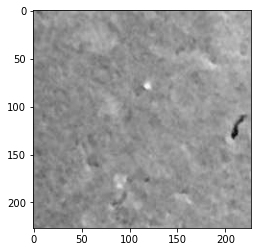

In [4]:
for categories in CATEGORIES:
    path = os.path.join(DATADIR,categories)
    for image in os.listdir(path):
        img_array= cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [5]:
img_array.shape

(227, 227)

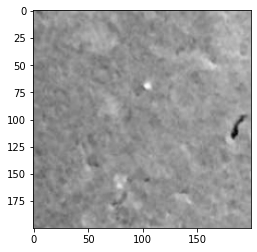

In [6]:
IMGSIZE=200

new_array = cv2.resize(img_array,(IMGSIZE,IMGSIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [7]:
training_data=[]

def create_training_dataset():
    for categories in CATEGORIES:
        path = os.path.join(DATADIR,categories)
        class_num= CATEGORIES.index(categories)#get the classification  (0 or  1). 0=Neg 1=Pos
    
        for image in tqdm(os.listdir(path)):
                try:
                    img_array= cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)
                    new_array = cv2.resize(img_array,(IMGSIZE,IMGSIZE))
                    training_data.append([new_array,class_num])
                
                except Exception as e:  # in the interest in keeping the output clean.
                    pass
            
create_training_dataset()

100%|█████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:39<00:00, 100.43it/s]


In [8]:
len(training_data)

8000

In [9]:
import random

random.shuffle(training_data)

In [10]:
for sample in training_data[:10]:
    print(sample[1])

1
1
0
0
1
1
0
0
0
0


In [11]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

In [12]:
X= np.array(X).reshape(-1, IMGSIZE, IMGSIZE, 1)

In [13]:
X.shape

(8000, 200, 200, 1)

In [14]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()